In [150]:
!git clone https://github.com/pocemuchka/robofootball

fatal: destination path 'robofootball' already exists and is not an empty directory.


In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
!ls

drive  robofootball  sample_data


In [153]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

WIND_X = 800
WIND_Y = 500

#canvas = np.ones((WIND_X, WIND_Y, 3), np.uint8) * 50

canvas = cv2.imread("/content/robofootball/homework/sahrs_on_the_field.jpg")# [100:500, 200:300, :]

#plt.pause(0.05)
#plt.clf()

In [154]:
print(canvas.shape, type(canvas[0, 0, 0]))

(1280, 720, 3) <class 'numpy.uint8'>


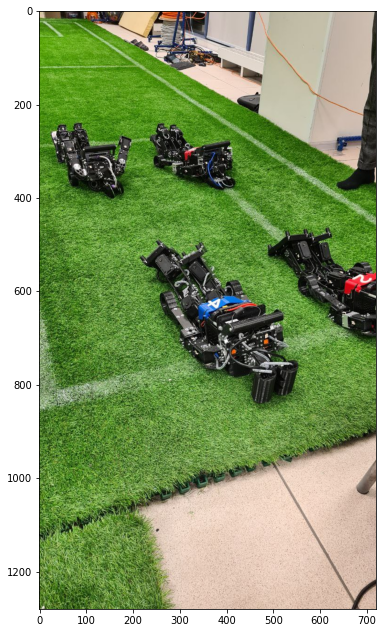

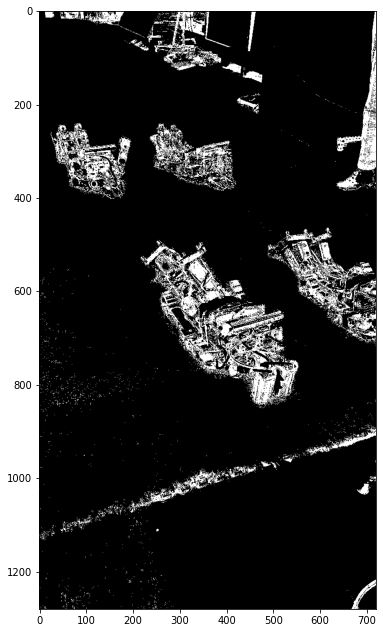

In [155]:
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

#print(img.shape)

plt.figure(figsize=(12, 11))

#color scheme (gray)
plt.imshow(img)
plt.show()

mask = cv2.inRange(img, (12, 15, 16), (208, 86, 150))

plt.figure(figsize=(12, 11))
plt.imshow(mask, cmap="gray")
plt.show()

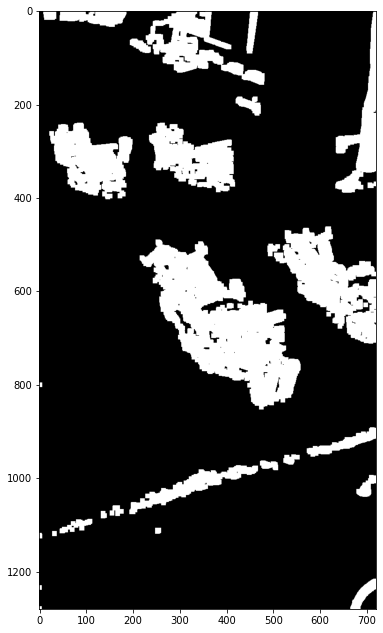

In [164]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 2)
plt.figure(figsize=(12, 11))
plt.imshow(dilation, cmap="gray")

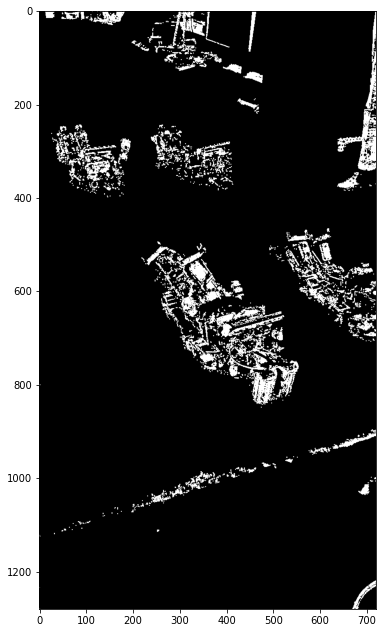

In [162]:
kernel = np.ones((2,2),np.uint8)
erosion =cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(12, 11))
plt.imshow(erosion, cmap="gray")

In [141]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
 
def f(rl, gl, bl, rh, gh, bh):
    # canvas = np.zeros ((WIND_Y, WIND_X, 3), np.uint8)

    # canvas[:, :, 0] = r
    # canvas[:, :, 1] = g
    # canvas[:, :, 2] = b
    
    mask = cv2.inRange(img, (rl, gl, bl), (rh, gh, bh))

    plt.figure (figsize=(12, 10))
    plt.imshow (mask, cmap="gray")
    plt.show ()
    plt.pause (0.05)
    plt.clf ()
 
interactive_plot = interactive(f, rl = (0, 255, 1), gl = (0, 255, 1), bl = (0, 255, 1),
                                  rh = (0, 255, 1), gh = (0, 255, 1), bh = (0, 255, 1))
 
output = interactive_plot.children[-1]
output.layout.height = str (WIND_Y) + 'px'
output.layout.width = str (WIND_X) + 'px'
interactive_plot

interactive(children=(IntSlider(value=127, description='rl', max=255), IntSlider(value=127, description='gl', …

In [167]:
import cv2
# Threshold it so it becomes binary
ret, thresh = cv2.threshold(dilation,0,255,(cv2.THRESH_BINARY+cv2.THRESH_OTSU))
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

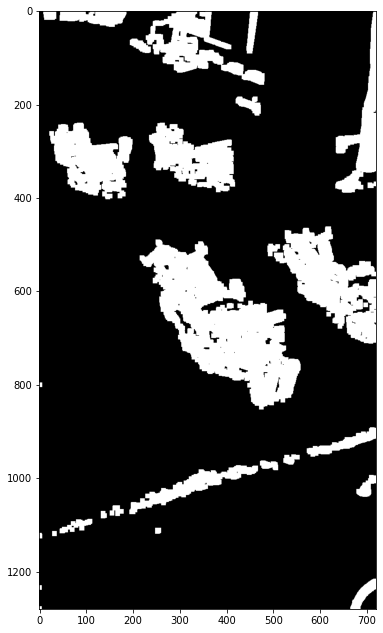

In [168]:
plt.figure(figsize=(12, 11))
plt.imshow(thresh, cmap="gray")